In [1]:
from gamesopt.train_distributed import train, TrainDistributedConfig
from gamesopt.games import GameOptions, QuadraticGameConfig, GameType
from gamesopt.optimizer import OptimizerOptions, OptimizerType
from gamesopt.aggregator import AggregationOptions, AggregatorType
from gamesopt.attacks import AttackOptions, AttackType
import matplotlib.pyplot as plt

%matplotlib widget
%load_ext autoreload
%autoreload 1

In [27]:
n_iter = 200

n_total = 20
n_byzan = 4

num_samples = 100
dim = 2
bias = True
sigma = 1e-2  # actually scales sigma
mu = 1e-2
ell = 1e2

attack_type = AttackType.BF
rn_sigma = 0.

use_bucketing = True
bucketing_s = 2
aggregator_type = AggregatorType.RFA
trimmed_mean_b = 10
krum_m = 2
clipping_tau = 102
clipping_n_iter = 1
rfa_T: int = 10
rfa_nu: int = 0.1

optimizer_type = OptimizerType.SGDARA
lr = 1/2/ell
batch_size = 1

aggregation_options = AggregationOptions(n_total=n_total,
                                         n_byzan=n_byzan,
                                         aggregator_type=aggregator_type,
                                         use_bucketing=use_bucketing,
                                         bucketing_s=bucketing_s,
                                         trimmed_mean_b=trimmed_mean_b,
                                         krum_m=krum_m,
                                         clipping_tau=clipping_tau,
                                         clipping_n_iter=clipping_n_iter,
                                         rfa_T=rfa_T,
                                         rfa_nu=rfa_nu)

quadratic_game_options = QuadraticGameConfig(num_samples=num_samples,
                                             dim=dim,
                                             num_players=2,
                                             bias=bias,
                                             sigma=sigma,
                                             mu=mu,
                                             ell=ell)

game_options = GameOptions(GameType.QUADRATIC, quadratic_game_options)

attack_options = AttackOptions(n_total=n_total,
                               n_byzan=n_byzan,
                               attack_type=attack_type,
                               rn_sigma=rn_sigma)

optimizer_options = OptimizerOptions(optimizer_type=optimizer_type,
                                     lr=lr,
                                     batch_size=batch_size,
                                     aggregation_options=aggregation_options,
                                     attack_options=attack_options)

config = TrainDistributedConfig(game=game_options,
                                optimizer=optimizer_options,
                                num_iter=n_iter,
                                n_process=n_total)
print(config)

TrainDistributedConfig(game=GameOptions(game_type=<GameType.QUADRATIC: 'quadratic'>, quadratic_options=QuadraticGameConfig(num_samples=100, dim=2, num_players=2, bias=True, sigma=0.01, mu=0.01, ell=100.0, matrix=None)), optimizer=OptimizerOptions(optimizer_type=<OptimizerType.SGDARA: 'SGDARA'>, lr=0.005, batch_size=1, aggregation_options=AggregationOptions(n_total=20, n_byzan=4, aggregator_type=<AggregatorType.RFA: 'RFA'>, use_bucketing=True, bucketing_s=2, clipping_tau=102, clipping_n_iter=1, trimmed_mean_b=10, krum_m=2, rfa_T=10, rfa_nu=0.1), attack_options=AttackOptions(n_total=20, n_byzan=4, attack_type=<AttackType.BF: 'BitFlipping'>, rn_sigma=0.0, ipm_epsilon=0.0, alie_z=None), full_batch=None), num_iter=200, n_process=20)


In [28]:
record = train(config)

Trying port 37152
0           

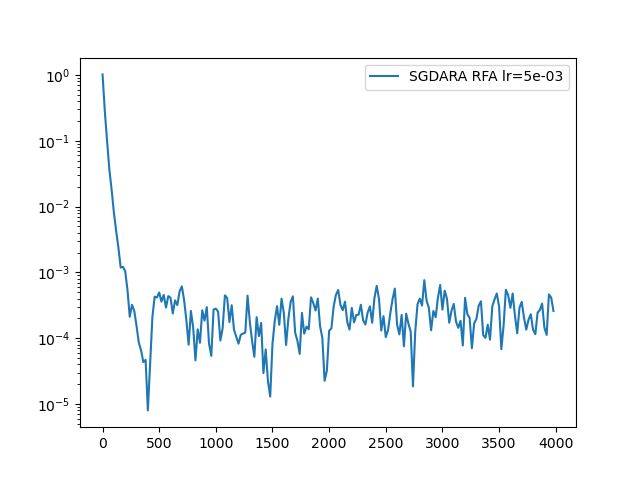

In [23]:
plt.figure()
plt.yscale('log')
record.load_metrics()
# plt.figure()
plt.plot(record.metrics.num_grad, record.metrics.hamiltonian,
         label="%s %s lr=%.e" % (config.optimizer.optimizer_type.value,
                                 config.optimizer.aggregation_options.aggregator_type.value,
                                 config.optimizer.lr))
plt.yscale('log')
plt.legend()
plt.show()

In [24]:
min(record.metrics.hamiltonian)

8.010953024495393e-06